In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings

# Read ITSM data into a dataframe
analysis_df = pd.read_csv('data\\IT_Tickets_All_time_cleaned.csv', index_col=0)
analysis_df.head()

Priority Customer Name         Description          Location Room #  \
ID                                                                            
100002         2           XXX  Ticket description           Moncton  A2134   
100003         2           XXX  Ticket description           Moncton   1233   
100005         3           XXX  Ticket description        Saint John     xx   
100006         5           XXX  Ticket description  Corporate Office  a2008   
100011         3           XXX  Ticket description           Moncton    asd   

                    Created Owned By             Type Owned By Team    Status  \
ID                                                                              
100002  2015-06-03 15:27:00      YYY  Service Request     MO-Tier 2    Closed   
100003  2015-06-03 16:02:00      YYY  Service Request     MO-Tier 2  Resolved   
100005  2015-06-04 08:13:00      YYY         Incident        Tier 1    Closed   
100006  2015-06-04 08:49:00      YYY         Incident        Tier 1    Closed   
100011  2015-06-04 13:51:00      YYY         Incident        Tier 1    Closed   

       SLA Resolve By Deadline     Closed Date Time Customer Type  \
ID                                                                  
100002     2015-06-10 15:27:00  2015-06-08 16:02:00         Staff   
100003     2015-06-10 16:02:00                  NaN         Guest   
100005     2015-06-09 08:15:00  2015-06-10 12:51:00         Guest   
100006     2015-06-17 08:52:00  2015-06-09 09:25:00         Staff   
100011     2015-06-09 13:51:00  2015-06-10 12:51:00         Staff   

        Closed on 1st Call stat_Date Time Resolved  stat_Response Time  \
ID                                                                       
100002               False     2015-06-03 16:01:00                 NaN   
100003               False     2015-06-08 15:04:00                 NaN   
100005               False     2015-06-05 12:50:00                 NaN   
100006               False     2015-06-04 09:25:00                 NaN   
100011               False     2015-06-05 12:50:00                 NaN   

        stat_SLA Resolution Breached                       Category  \
ID                                                                    
100002                         False      User Account and Security   
100003                         False                       Employee   
100005                         False  Int. Document Management IDMS   
100006                         False                Submit Incident   
100011                         False                Submit Incident   

                 Subcategory               Service  
ID                                                  
100002  New Employee Account  Enterprise Apps-SIMS  
100003    New Employee Setup    Account Management  
100005       Submit Incident    Account Management  
100006      Corporate Office   Computer - Hardware  
100011               Moncton   Computer - Hardware

In [9]:
import datetime as dt

analysis_df['Created'] = pd.to_datetime(analysis_df['Created'])
analysis_df['Created']=analysis_df['Created'].map(dt.datetime.toordinal)
analysis_df['SLA Resolve By Deadline'] = pd.to_datetime(analysis_df['SLA Resolve By Deadline'])
analysis_df['SLA Resolve By Deadline']=analysis_df['SLA Resolve By Deadline'].map(dt.datetime.toordinal)
analysis_df['Closed Date Time'] = pd.to_datetime(analysis_df['Closed Date Time'])
analysis_df['Closed Date Time']=analysis_df['Closed Date Time'].map(dt.datetime.toordinal)
analysis_df['stat_Date Time Resolved'] = pd.to_datetime(analysis_df['stat_Date Time Resolved'])
analysis_df['stat_Date Time Resolved']=analysis_df['stat_Date Time Resolved'].map(dt.datetime.toordinal)

analysis_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 133837 entries, 100002 to 334699
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Priority                      133837 non-null  int64  
 1   Customer Name                 133837 non-null  object 
 2   Description                   133836 non-null  object 
 3   Location                      133837 non-null  object 
 4   Room #                        110505 non-null  object 
 5   Created                       133837 non-null  int64  
 6   Owned By                      133713 non-null  object 
 7   Type                          133837 non-null  object 
 8   Owned By Team                 133837 non-null  object 
 9   Status                        133837 non-null  object 
 10  SLA Resolve By Deadline       133837 non-null  int64  
 11  Closed Date Time              133837 non-null  int64  
 12  Customer Type                 133826 non-nul

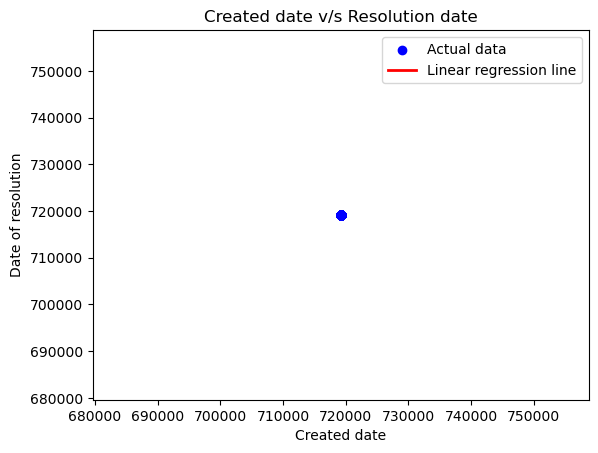

In [10]:
x=analysis_df['Created']
y=analysis_df['stat_Date Time Resolved']

# Reshape the data
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Plot the data points
plt.scatter(x, y, color='blue', label='Actual data')

# Plot the linear regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear regression line')

# Add labels and a legend
plt.xlabel('Created date')
plt.ylabel('Date of resolution')
plt.title('Created date v/s Resolution date')
plt.legend()

# Show the plot
plt.show()

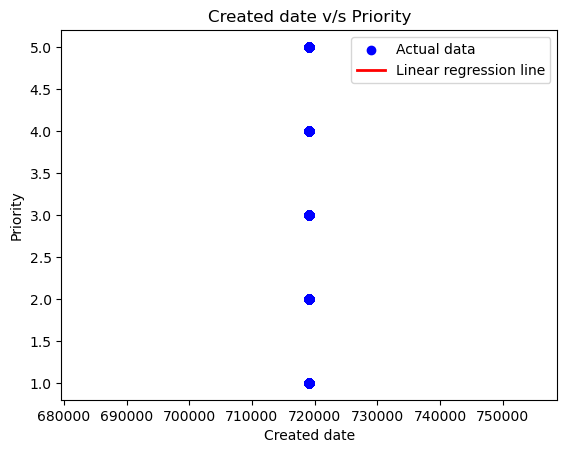

In [13]:
x=analysis_df['Created']
y=analysis_df['Priority']

# Reshape the data
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Plot the data points
plt.scatter(x, y, color='blue', label='Actual data')

# Plot the linear regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear regression line')

# Add labels and a legend
plt.xlabel('Created date')
plt.ylabel('Priority')
plt.title('Created date v/s Priority')
plt.legend()

# Show the plot
plt.show()

In [14]:
import statsmodels.api as sm

X= analysis_df
y=analysis_df['Created']
X = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,X['Priority'])

model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                Created   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                          2.660e+06
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                        0.00
Time:                        17:41:15   Log-Likelihood:                     -1.7915e+06
No. Observations:              133837   AIC:                                  3.583e+06
Df Residuals:                  133836   BIC:                                  3.583e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
import statsmodels.api as sm

X= analysis_df[['Priority','SLA Resolve By Deadline','Closed Date Time','Created']]
y=analysis_df['stat_Date Time Resolved']
X = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,X)

model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     stat_Date Time Resolved   R-squared:                        -inf
Model:                                 OLS   Adj. R-squared:                   -inf
Method:                      Least Squares   F-statistic:                -1.338e+05
Date:                     Tue, 30 Jan 2024   Prob (F-statistic):               1.00
Time:                             17:45:59   Log-Likelihood:             2.3968e+06
No. Observations:                   133837   AIC:                        -4.794e+06
Df Residuals:                       133835   BIC:                        -4.794e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

C:\Users\aysha\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
